# List 3

## Random graph

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from scipy.stats import binom
sns.set()


In [3]:
import networkx as nx
import numpy as np

class Graph(nx.Graph):
    
    def random_graph(self, n, p):
        eges_nr = np.sum([i for i in range(n)])
        edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n) if np.random.uniform() < p ])
        self.add_nodes_from(range(n))
        self.add_edges_from(edges)
        return self

    def degree_sequence(self) -> list:
        degree_list = [d for n, d in self.degree()]
        return sorted(degree_list, reverse=True)


In [16]:
n = 4000
p = 0.1
g1 = Graph().random_graph(n, p)
g1.degree_sequence()
degree_sequence = g1.degree_sequence()
xs = np.arange(min(degree_sequence), max(degree_sequence),1)
# plt.plot(xs, binom(n-1,p).pmf(xs), label = "$f_{B(%d,%a)}(x)$" %(n-1,p))


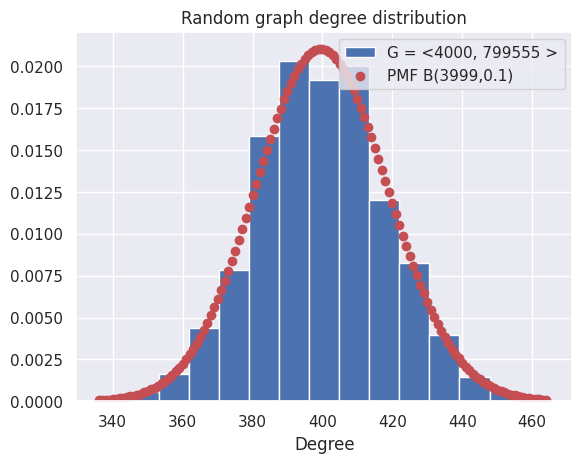

In [19]:

plt.hist(degree_sequence, density= True, bins = 15, label = f"G = <{len(g1.nodes)}, {len(g1.edges)} >") 
plt.scatter(xs, binom(n-1,p).pmf(xs),c= "r", label = f"PMF B({n-1},{p})")
   
plt.title("Random graph degree distribution")
plt.xlabel("Degree")
plt.legend()
plt.show()

In [20]:
print(f"""
nodes = {len(g1.nodes)},
edges = {len(g1.edges)},
mean degre = {np.mean(degree_sequence)},
VAR degre = {np.var(degree_sequence)}""")


nodes = 4000,
edges = 799555,
mean degre = 399.7775,
VAR degre = 351.83699375000003


## Watts-Strogatz model

In [21]:
class Graph(nx.Graph):
    
    def random_graph(self, n, p):
        eges_nr = np.sum([i for i in range(n)])
        edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n) if np.random.uniform() < p ])
        # all_edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n)])
        # taked_edes = np.random.uniform(size=eges_nr)<p
        # edges_to_add = all_edges[taked_edes]
        self.add_nodes_from(range(n))
        # self.add_edges_from(edges_to_add)
        self.add_edges_from(edges)
        return self
    
    def Watts_Strogatz_model(self, n , k, p):
        """Returns a Watts–Strogatz small-world graph.

        Parameters
        ----------
        n : int
            The number of nodes
        k : int
            Each node is joined with its `k` nearest neighbors in a ring
            topology.
        p : float
            The probability of rewiring each edge
        """
        if k>n:
            raise ValueError(f"The parameter 'k' = {k} is greater than parametr 'n' = {n}")
        elif k == n:
            return nx.complete_graph(n)
        # g = nx.Graph()
        self.add_nodes_from(range(n))
        
        nodes = self.nodes
        for i in range(n):
            for j in range(1, k // 2 + 1):
                self.add_edge(i, (i+j)%n)
                
        for node in nodes:
            for neighbour in range(1, k // 2 + 1):
                if np.random.uniform() < p:
                    random_note = np.random.choice(nodes)
                    while node == random_note or self.has_edge(node, random_note):
                        random_note = np.random.choice(nodes)
                    else:
                        self.remove_edge(node, (node + neighbour)%n)
                        self.add_edge(node, random_note)
                else:
                    pass
        return self
    
    def degree_sequence(self) -> list:
        degree_list = [d for n, d in self.degree()]
        return sorted(degree_list, reverse=True)


In [22]:
def density(k, K, p):
    pk = 0
    for n in range(min(k - K//2, K//2)+1):
        C_nk = np.math.factorial(K//2)/(np.math.factorial(n)*np.math.factorial(K//2-n))
        pk += C_nk*(1-p)**n*p**(K/2-n)*(p*K/2)**(k-n-K/2)/np.math.factorial(k-n-K//2)*np.math.exp(-K//2*p)
    return pk

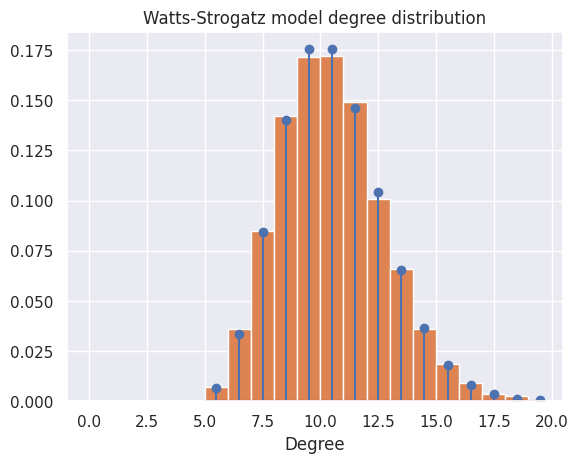

In [23]:
n = 4000
p = 1
K = 10
g2 = Graph().Watts_Strogatz_model(n, K, 1)


degree_sequence = g2.degree_sequence()
xs = np.arange(min(degree_sequence), max(degree_sequence),1)
plt.plot(xs, binom(n-1,0.5).pmf(xs))
plt.hist(degree_sequence, density= True, bins=range(max(degree_sequence)))
xs = np.arange(min(degree_sequence), max(degree_sequence),1)
plt.stem(xs+0.5, [density(k, K, p) for k in xs])
plt.title("Watts-Strogatz model degree distribution")
plt.xlabel("Degree")
plt.show()

In [24]:
print(f"""
nodes = {len(g2.nodes)},
edges = {len(g2.edges)},
mean degre = {np.mean(degree_sequence)},
VAR degre = {np.var(degree_sequence)}""")


nodes = 4000,
edges = 20000,
mean degre = 10.0,
VAR degre = 5.159


## Barabasi-Albert model

In [25]:
class Graph(nx.Graph):
    
    def random_graph(self, n, p):
        eges_nr = np.sum([i for i in range(n)])
        edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n) if np.random.uniform() < p ])
        # all_edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n)])
        # taked_edes = np.random.uniform(size=eges_nr)<p
        # edges_to_add = all_edges[taked_edes]
        self.add_nodes_from(range(n))
        # self.add_edges_from(edges_to_add)
        self.add_edges_from(edges)
        return self
    
    def Watts_Strogatz_model(self, n , k, p):
        """Returns a Watts–Strogatz small-world graph.

        Parameters
        ----------
        n : int
            The number of nodes
        k : int
            Each node is joined with its `k` nearest neighbors in a ring
            topology.
        p : float
            The probability of rewiring each edge
        """
        if k>n:
            raise ValueError(f"The parameter 'k' = {k} is greater than parametr 'n' = {n}")
        elif k == n:
            return nx.complete_graph(n)
        # g = nx.Graph()
        self.add_nodes_from(range(n))
        
        nodes = self.nodes
        for i in range(n):
            for j in range(1, k // 2 + 1):
                self.add_edge(i, (i+j)%n)
                
        for node in nodes:
            for neighbour in range(1, k // 2 + 1):
                if np.random.uniform() < p:
                    random_note = np.random.choice(nodes)
                    while node == random_note or self.has_edge(node, random_note):
                        random_note = np.random.choice(nodes)
                    else:
                        self.remove_edge(node, (node + neighbour)%n)
                        self.add_edge(node, random_note)
                else:
                    pass
        return self

    def barabasi_albert_model(self, m0, n, iterations, inicial_praph = None):
        if inicial_praph:
            g = inicial_praph
        else:
            g = nx.complete_graph(m0)
        degrees = {note:degre for note,degre in g.degree() }
        for node in range(m0, m0 + iterations):
            values = np.array(list(degrees.values()))
            nodes_to_conect = np.random.choice(list(degrees.keys()), size = n, replace=False, p = values/sum(values))
            degrees[node] = n
            for node_to_conect in nodes_to_conect:
                degrees[node_to_conect] += 1
            g.add_edges_from([[node, i] for i in nodes_to_conect ])
        return g
        
    def degree_sequence(self) -> list:
        degree_list = [d for n, d in self.degree()]
        return sorted(degree_list, reverse=True)


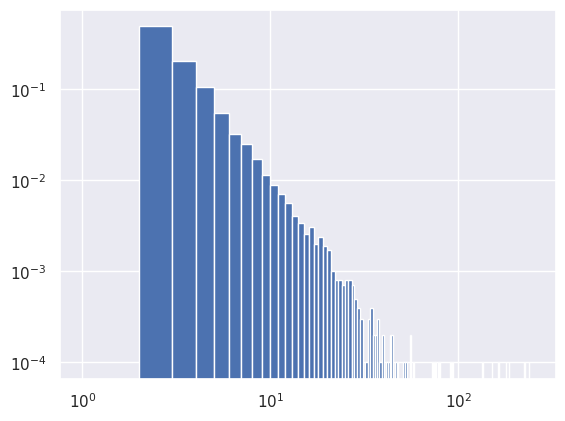

In [26]:
m0 = 10
n = 2
iterations  = 10000
g3 = Graph().barabasi_albert_model(m0, n, iterations = iterations)


degree_sequence = sorted([d for n, d in g3.degree()], reverse=True)  # degree sequence
n, bins, patches = plt.hist(degree_sequence, density= True, bins=range(max(degree_sequence)))
plt.yscale("log")
plt.xscale("log")
plt.show()

/tmp/ipykernel_77511/32408668.py:8: RuntimeWarning: divide by zero encountered in log
  ln_n_tail = np.log(n_tail)
/tmp/ipykernel_77511/32408668.py:13: RuntimeWarning: divide by zero encountered in power
  ys = np.exp(b)*xs**a


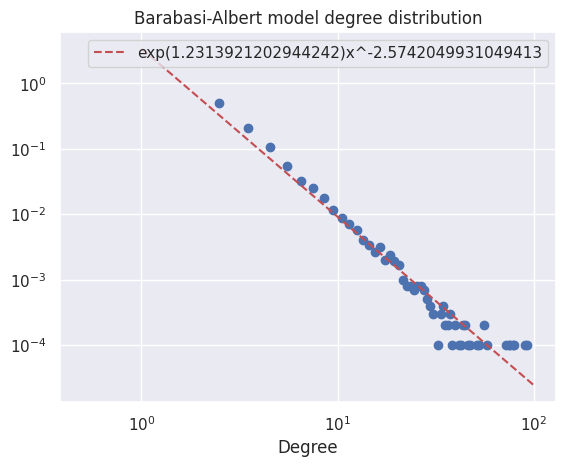

In [27]:
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
tail = 100
bins_mean_tail = bins_mean[:tail]
n_tail = n[:tail]

plt.scatter(bins_mean_tail, n_tail)
ln_bins_mean_tail = np.log(bins_mean_tail)
ln_n_tail = np.log(n_tail)
idx = np.isfinite(ln_bins_mean_tail) & np.isfinite( ln_n_tail )

a,b = np.polyfit(ln_bins_mean_tail[idx], ln_n_tail[idx], 1)
xs = np.linspace(0,max(bins_mean_tail),100)
ys = np.exp(b)*xs**a
plt.plot(xs, ys, "r--" , label = f"exp({b})x^{a}")

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.title("Barabasi-Albert model degree distribution")
plt.xlabel("Degree")
plt.show()


In [28]:
print(f"""
nodes = {len(g3.nodes)},
edges = {len(g3.edges)},
mean degre = {np.mean(degree_sequence)},
VAR degre = {np.var(degree_sequence)}""")


nodes = 10010,
edges = 20045,
mean degre = 4.004995004995005,
VAR degre = 52.48209293204298
